In [422]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

## 2.3.1. Постройте гистограммы симулированных случайных значений по следующим законам с варьируемыми параметрами

а) нормальному (воспользоваться “=нормобр(слчис();a;s)”);

б) треугольному;

в) распределение Вейбулла;

г) гамма-распределение;

д) бэта-распределение.

Постройте графики соответствующих плотностей. Примените непараметрический критерий Пирсона для проверки гипотез о соответствующем законе распределения для каждой выборки.

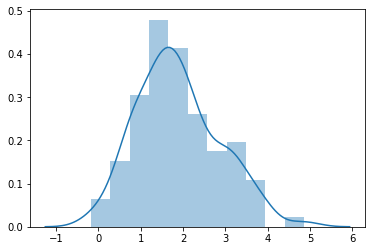

In [63]:
# тест на правильную работу гистограмм и плотностей на меньшее количество значений
norm = np.random.normal(2, 1, 100)
sns.distplot(norm);

p = 0.593349
Принимаем H0


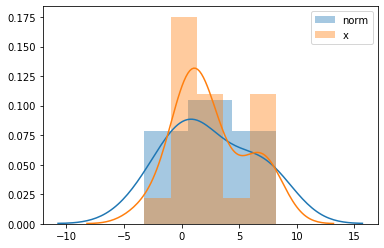

In [167]:
norm = np.random.normal(2, 3, 10)
normb = np.random.normal(2, 3, size=10)
x = np.concatenate((norm, normb))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # Проверка 
    print("Принимаем H1")
else:
    print("Принимаем H0")

sns.distplot(norm, label='norm')
sns.distplot(x, label='x')
plt.legend()
plt.show()

In [64]:
np.random.seed(42)

#### Нормальное

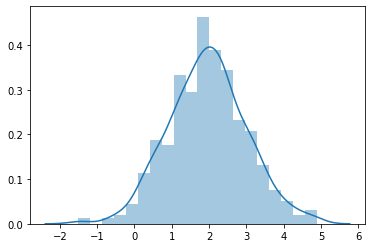

In [176]:
norm = np.random.normal(2, 1, 500)
sns.distplot(norm);

p = 0.958617
Принимаем H0


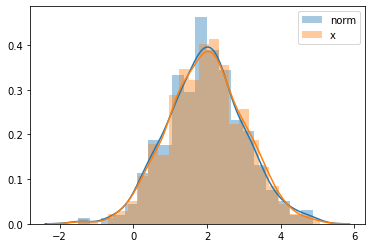

In [177]:
normb = np.random.normal(2, 1, size=500)
x = np.concatenate((norm, normb))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # Проверка 
    print("Принимаем H1")
else:
    print("Принимаем H0")

sns.distplot(norm, label='norm')
sns.distplot(x, label='x')
plt.legend()
plt.show()

#### Треугольное

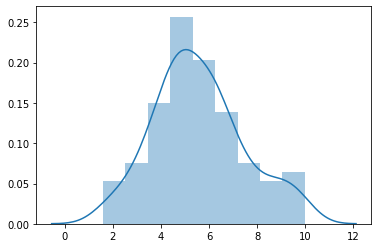

In [207]:
triang = np.random.triangular(1, 5, 11, 100)
sns.distplot(triang);

p = 0.0673143
Принимается H0


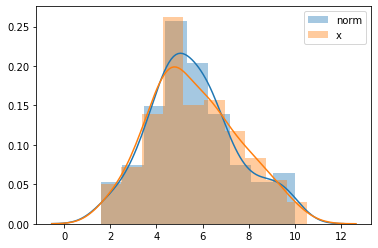

In [208]:
triangb = np.random.triangular(1, 5, 11, 100)
x = np.concatenate((triang, triangb))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # Проверка 
    print("Принимаем H1")
else:
    print("Принимается H0")


sns.distplot(triang, label='norm')
sns.distplot(x, label='x')
plt.legend()
plt.show()

#### Вейбулл

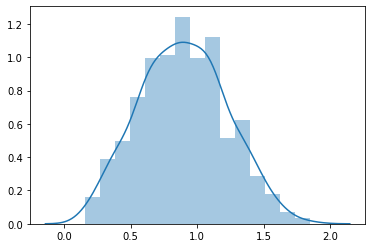

In [198]:
a = 3 # shape
weib = np.random.weibull(a, 500)
sns.distplot(weib);

p = 0.0447162
Принимается H0


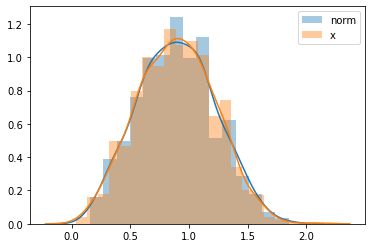

In [199]:
weibb = np.random.weibull(a, 500)
x = np.concatenate((weib, weibb))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # Проверка 
    print("Принимаем H1")
else:
    print("Принимается H0")


sns.distplot(weib, label='norm')
sns.distplot(x, label='x')
plt.legend()
plt.show()

#### Гамма

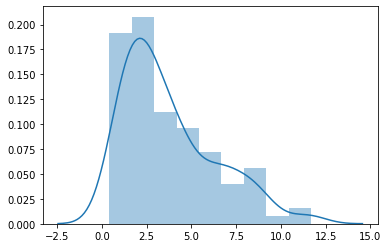

In [236]:
shape, scale = 2., 2.  # среднее=4, ст.откл=2*sqrt(2)
gamma = np.random.gamma(shape, scale, 100)
sns.distplot(gamma);

p = 1.1273e-10
Принимаем H1


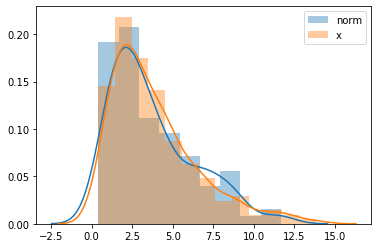

In [237]:
gammab = np.random.gamma(shape, scale, 100)
x = np.concatenate((gamma, gammab))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # Проверка 
    print("Принимаем H1")
else:
    print("Принимается H0")


sns.distplot(gamma, label='norm')
sns.distplot(x, label='x')
plt.legend()
plt.show()

#### Бета

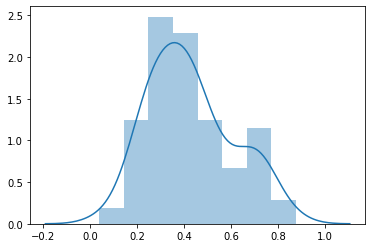

In [225]:
a, b = 3, 4
beta = np.random.beta(a, b, 100)
sns.distplot(beta);

p = 0.0664914
Принимается H0


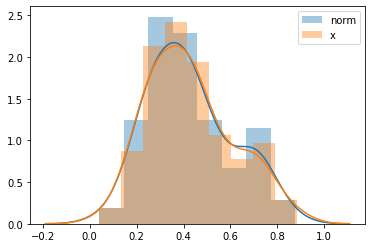

In [390]:
betab = np.random.beta(a, b, 10)
x = np.concatenate((beta, betab))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # Проверка 
    print("Принимаем H1")
else:
    print("Принимается H0")


sns.distplot(beta, label='norm')
sns.distplot(x, label='x')
plt.legend()
plt.show()

## 2.3.2. Постройте алгоритм, рассчитывающий время обслуживания 4 заявок в очереди, если время обслуживания одной заявки экспоненциально распределено с $lambda$=1. Проверьте гипотезу о соответвествии общего времени обслуживания распределению Эрланга с 4 степенями свободы и интенсивностью $lambda$.

In [392]:
def generate():
    return np.log(1/np.random.rand(1))

def generate_distribution(n):
    dist = []
    for g in range(n):
        queue = []
        for i in range(4):
            queue.append(generate())

        dist.append(np.sum(queue))
        
    return dist

p = 0.0367879
Принимается H0


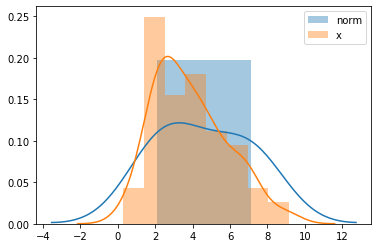

In [428]:
all_queues = generate_distribution(100)
that_queue = generate_distribution(5)
x = np.concatenate((all_queues, that_queue))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # Проверка 
    print("Принимаем H1")
else:
    print("Принимается H0")


sns.distplot(that_queue, label='norm')
sns.distplot(x, label='x')
plt.legend()
plt.show()